<a href="https://colab.research.google.com/github/21PA1A6132/MACHINE-LEARNING/blob/main/Gradient_Descent_on_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Boston = np.loadtxt('/content/drive/MyDrive/Machine Learning/boston_x_y_train.csv',delimiter=',')

In [ ]:
Boston.shape

(379, 14)

In [ ]:
x = Boston[:,:13]
y = Boston[:,13]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)
x = x_normalized

In [ ]:
c_column = np.ones((379,1))
x= np.concatenate((x,c_column),axis=1)

In [ ]:
M=x.shape[0]
N=x.shape[1]
print(M)
print(N)

379
14


In [ ]:
def stepgrad(x,y,learning_rate,m):
  m_slope = np.zeros(N)
  for i in range(M):
    prediction =np.dot(x[i],m)
    error = y[i]-prediction
    for j in range(N):
       m_slope[j] += (-2 / M) * error * x[i,j]
  new_m = m - (learning_rate * m_slope)
  return new_m

In [ ]:
def cost(x,y,m):
  total_cost=0
  for i in range(M):
    for j in range(N):
      total_cost += (1/M)*((y[i]-m[j]*x[i][j])**2)
  return total_cost

In [ ]:
def gradient(x,y,num_iterations,learning_rate):
  m = np.zeros(x.shape[1])
  costs = []
  for i in range(num_iterations):
    m = stepgrad(x, y, learning_rate, m)
    if i % 10 == 0:  # Record cost every 10 iterations
      current_cost = cost(x, y, m)
      costs.append(current_cost)
      print(i, "Cost:", current_cost)
  return m, costs

In [ ]:
training_iterations = 1000  # Increase iterations
learning_rate = 0.01  # Adjust learning rate
m, costs = gradient(x, y, training_iterations, learning_rate)
print("Final coefficients:", m)


0 Cost: 8358.614760018003
10 Cost: 8147.438805956024
20 Cost: 8021.730471880308
30 Cost: 7941.627281015819
40 Cost: 7889.186719064498
50 Cost: 7854.468367652465
60 Cost: 7831.37882481721
70 Cost: 7816.0019181329435
80 Cost: 7805.766476683431
90 Cost: 7798.968069134837
100 Cost: 7794.471635102675
110 Cost: 7791.519400450455
120 Cost: 7789.60462724284
130 Cost: 7788.387978596527
140 Cost: 7787.641905714441
150 Cost: 7787.213594022555
160 Cost: 7787.000243522271
170 Cost: 7786.93256163373
180 Cost: 7786.963730628489
190 Cost: 7787.062027772855
200 Cost: 7787.205884478634
210 Cost: 7787.380575230218
220 Cost: 7787.575996342021
230 Cost: 7787.785174039611
240 Cost: 7788.0032610035605
250 Cost: 7788.2268603513085
260 Cost: 7788.453569328485
270 Cost: 7788.6816705900565
280 Cost: 7788.909922749501
290 Cost: 7789.137417793976
300 Cost: 7789.363483617703
310 Cost: 7789.587617060263
320 Cost: 7789.809437621078
330 Cost: 7790.028655227611
340 Cost: 7790.245047589659
350 Cost: 7790.45844412048
360

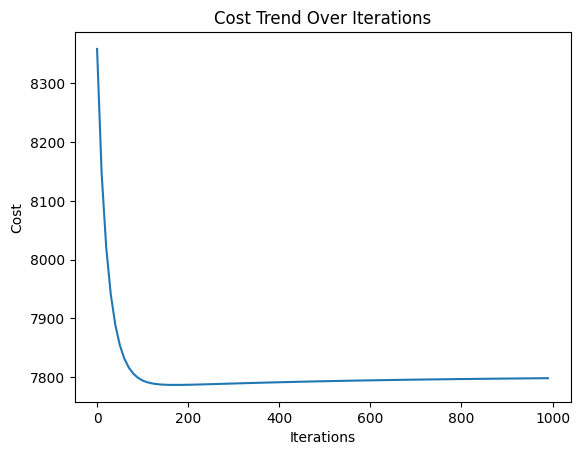

In [ ]:
# Plotting the cost trend
plt.plot(range(0, training_iterations, 10), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Trend Over Iterations')
plt.show()


In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [ ]:
y_pred_train = np.dot(x,m)
mse_train = mean_squared_error(y, y_pred_train)
r2_train = r_squared(y, y_pred_train)
print(f'Mean Squared Error on training data: {mse_train}')
print(f'R-squared on training data: {r2_train}')

Mean Squared Error on training data: 23.511840724956585
R-squared on training data: 0.7326159246456125


In [ ]:
x_test = np.loadtxt('/content/drive/MyDrive/Machine Learning/boston_x_test.csv',delimiter=',')
c_column = np.ones((127,1))
x_test= np.concatenate((x_test,c_column),axis=1)

In [ ]:
y_pred_test = np.dot(x_test,m)


In [ ]:
# Assuming 'y_pred_test' contains the predictions
np.savetxt('/content/drive/MyDrive/Machine Learning/boston_y_pred_test.csv', y_pred_test, delimiter=',')


In [ ]:
print(y_pred_test)


[12.08000096 28.77232847 22.43030522 24.20786186 20.85964911  2.60675343
 30.04831326 24.7064402  18.70308426 23.5041193  24.1012911  17.72989878
 17.69006695 21.68654836 42.65436519 23.87746713 24.39683299 27.71237369
 20.20584741 31.3590747  24.05599087 24.88303149 33.95835125 36.45700168
 32.01769176 16.42325457 23.42963375 33.14164466 25.01429481 33.83631571
 16.90564321 26.16390365 23.36113567 25.38126891 14.79632517 29.64063358
 26.168845   20.58736548 24.12092738  9.20867199  8.02200663 28.81939205
 29.51051786 19.87732423 20.25868593  2.79486145 39.55788327 25.71056785
 29.91006696 16.69860639 17.73857761 40.57444236 17.48343428 21.09853378
 15.5873732  21.24147295 18.36435067 23.13137087 13.64730058 17.10768869
 14.8519273  29.18999536 25.3025832  25.48713701 17.06041773 17.21526246
 34.69383133 16.89686793 27.00706243 22.40519561 29.45895517 27.02211453
 17.82160075  5.41221615 36.49451121 25.06614141 29.88695762 27.03372935
 16.05160768 32.58793643 19.25919799 22.8912219  22